# Heap Sort
Heap sort orders an array while using binary maximum heap data structures. Binary maximum heap data structures are complete binary trees where the root node is the largest item, and parent nodes are always greater than their children nodes. The array is arranged so the root node has index 0; for parent i: the left child has index 2i + 1, and the right child has index 2i + 2. Heap sort swaps the value of the root (largest item) and the last item of the heap array, decreases the size of the heap array by 1, then rearranges the heap array to be a maximum heap data structure. It repeats this process until a final array is created. Heap sort requires constructing a heap from the numbers we want to sort, which takes additional time. However, overall, heap sort is an efficient sorting algorithm. <br>

Facts about heap sort:
* comparison sorting algorithm: compares elements of an array
* not a stable sorting algorithm: does not preserve the relative order of equivalent elements
* in-place algorithm: has space complexity O(1), meaning it is memory efficient and sorted array is made locally
* not an adaptive algorithm: the run time is not affected when given a partially sorted array
* deterministic algoirthm: when given a certain input, same sequece of steps and result occurs

In [1]:
# global imports
from time import time
import matplotlib.pyplot as plt
import math
from pandas import DataFrame
import statsmodels.formula.api as sm
import numpy as np
import import_ipynb
from CIandSETemplate import *

importing Jupyter notebook from CIandSETemplate.ipynb


## Heap Sort Function
Steps to implement heap sort function:
1. write the function for heap sort
 - set n to be the length of the array
 - create a for loop that creates a max heap, iterating from the largest index to the smallest index of the array. In each iteration, heapify the array, starting at index i. Children nodes are heapified first, and the loop moves up to the root node during the last iteration. 
 - create a for loop that sorts the array by extracting the largest element, iterating from the largest index to index 1. The root node (maximum array value) is swapped with the last item of the array, then the heap size is reduced by 1. Then, the array is heapified. 
 - the process continues until the tree does not contain any elements and the array is sorted. 

2. write the function for heapify
 - initialize the index of the largest element to be the root
 - find the indexes of the left and right children of the root
 - if the left child is larger than the root, set the index of the largest root to be the left index
 - if the right child is larger than the root, set the index of the largest root to be the right index
 - if the largest index does not equal the index of the root, swap the root and the larger value
 - recursively call the heapify() function on the index of the swapped root
 - this ensures the tree meets the property that parent nodes are larger than their children nodes

3. write the function for swapping values
 - create a temporary variable to hold i (the larger value)
 - set the array at index i equal to the value of j (the smaller value)
 - set the array at index j equal to the value of i (the larger value)

In [2]:
# heap sort function
def heapSort(arr):
    '''sorts an array of integers from smallest to largest'''
    n = len(arr)
    for i in range(n-1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        swap(arr, i, 0)
        heapify(arr, i, 0)

# heapify function
def heapify(arr, n, i):
    '''turns an array into a heap'''
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[largest] < arr[left]:
        largest = left
    if right < n and arr[largest] < arr[right]:
        largest = right
    if largest != i:
        swap(arr, i, largest)
        heapify(arr, n, largest)
        
# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Timing Function
To obtain observed values for the runtime of the algorithm, I wrote a function that times how long it takes for the program to heap sort an array. Steps to implement the timing function:
1. initialize a variable t that will hold the runtime
2. set t0 equal to the current time (before sorting)
3. sort the array with heap sort
4. set t1 to the current time (after sorting)
5. set t equal to the difference between t1 and t0, which is the run time for sorting the array
6. return the run time

In [3]:
def timeOneHeap(arr):
    '''times how long it takes to sort an array'''
    t = 0
    t0 = time()
    s = heapSort(arr)
    t1 = time()
    t = t1 - t0
    return t

## Sort Sample Arrays and Find Run Time
1. import arrrays of different lengths. These arrays are created in the arrays program. The arrays are used for each sorting algorithm, allowing for direct comparison of algorithms.
2. use timeOneHeap() function to find the run time of sorting each array

In [4]:
# import arrays
%store -r arr

# time how long it takes to sort each array
times = []
for element in arr:
    t = timeOneHeap(element)
    times.append(t)

## Theoretical Run Time with Big O
### Calculate Time Complexity of Heap Sort Function

#### Swap Function Pseudo Code

```
swap(array, i, j) 
    temp = array[i]      // C1, repeated once
    array[i] = array[j]  // C2, repeated once
    array[j] = temp      // C3, repeated once
    
T = C1 + C2 + C3
T = C
```

#### Heapify Function Pseudo Code

```
heapify(array, n, i)
	largest = i                                     // C1, repeated once
	left = 2 * i + 1                                // C2, repeated once
	right = 2 * i + 2                               // C3, repeated once
	if left < n and array[largest] < array[left]    // C4, repeated once
		largest = left
	if right < n and array[largest] < array[right]  // C5, repeated once
		largest = right
	if largest != i                                 // C6, repeated once
		swap(array, i, largest)                     // repeated once in runtime O(1)
		heapify(array, n, largest)                  // repeated once in runtime T(n/2)
        
T = C1 + C2 + C3 + C4 + C5 + C6 + O(1) + T(n/2) 
T = T(n/2) + C
```

- since this is a recurrence relationship, use Master Theorem to find time complexity
    - A = 1, B = 2, C = 0
    - log2(1) = 0, so C = log2(1)
    - then T(n) = O(n^Clog(n)) = O(log(n))

```
T = C1*logn + C2
```


#### Heap Sort Function Pseudo Code
```
heapSort(array)
	n = len(array)                 // C1, repeated once
	for i in range(n - 1, -1, -1)  // C2, repeated n + 1 times
		heapify(array, n, i)       // C3, repeated n times with runtime T(n/2)
	for i in range(n - 1, 0, -1)   // C4, repeated n + 1 times
		swap(arr, i, 0)            // C5, repeated n times
		heapify(array, i, 0)       // C6, repeated n times with runtime T(n/2)
        
T = C1 + C2*(n + 1) + C3*n*T(n/2) + C4*(n + 1) + C5*n + C6*n*T(n/2)
T = C1*n*T(n/2) + C2*n + C3
T = C1*nlogn + C2*n + C3
```

The time complexity for heap sort is nlog(n)

### Use Data to Find Coefficients for Theoretical Time Complexity Function O(nlog(n))
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n and nlog(n) where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use multiple linear regression to get the equation Y = a + bn + cnlog(n)
 - a, b, and c are ordinary least squares estimated coefficients
4. since heap sort is O(nlog(n)), theoretical run times are T = a + bn + cnlog(n)
 - use the coefficients found in multiple linear regression
 - n represents the length of the array

In [5]:
# array of ones
ones = [1, 1, 1, 1, 1, 1, 1, 1]

# array of lengths
length = [3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

# create array of lengthLogLength
lengthLogLength = []
for i in range(0, 8):
    val = length[i] * math.log2(length[i])
    lengthLogLength.append(val)

# create a dataframe
Data = {'ones': ones, 'length': length, 'lengthLogLength': lengthLogLength, 'times': times}
df = DataFrame(Data, columns=['ones', 'length', 'lengthLogLength', 'times'])
# matrix of predictors
X = df[['ones', 'length', 'lengthLogLength']]
# vector of responses
Y = df['times']

# fit multiple linear regression
result = sm.OLS(Y, X).fit()

# theoretical coefficients
a = result.params[0]
b = result.params[1]
c = result.params[2]

### Ordinary Least Squares Estimated Coefficients of Theoretical Time Complexity Function
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals <br>
* the coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length

In [6]:
# variable holding confidence intervals
confInt = result.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = result.bse

# array of terms
terms = ['1', 'n', 'nlog2(n)']

# print the summaries
for i in range(0, 3):
    est = '{:10.9f}'.format(result.params[i])
    lower = '{:10.9f}'.format(confInt[0][i])
    upper = '{:10.9f}'.format(confInt[1][i])
    se = '{:10.9f}'.format(stE[i])
    if i == 0:
        estIntercept(est)
        CIintercept(lower, upper)
        SEintercept(se)  
    else:
        estTerm(est, terms[i])
        CITerm(lower, upper, terms[i])
        SEterm(se, terms[i])
    print()

The estimated intercept is 0.012450179. If the size of an array is 0, on average, I expect the run time to be 0.012450179 seconds.
I am 95% confident that the true average run time for an array of length 0 is between 0.002394832 and 0.022505527 seconds.
The standard error of the intercept is 0.003911701.

The estimated coefficent for the n term is -0.000017612. If n by one unit, on average, I expect the run time to increase by -0.000017612 seconds.
I am 95% confident that the true expected change in run time for one unit increase in n is between -0.000031455 and -0.000003769 seconds.
The standard error of the coefficient for the n term is 0.000005385.

The estimated coefficent for the nlog2(n) term is 0.000001999. If nlog2(n) by one unit, on average, I expect the run time to increase by 0.000001999 seconds.
I am 95% confident that the true expected change in run time for one unit increase in nlog2(n) is between 0.000001036 and 0.000002962 seconds.
The standard error of the coefficient 

## Compare Theoretical and Observed Time

### Scatterplot

I created a scatterplot of the observed run times and the theoretical run times for sorting arrays of different lengths.

 - observed run times are plotted in blue, theoretical trend line is drawn in red
 - observed values are very close to the theoretical trend line, meaning the theoretical run time of O(nlog(n)) is a good estimate for this data
 - discrepancies between observed and theoretical run time may be caused by experimental error: heap sort orders arrays very quickly, meaning any delay encountered by the computer significantly impacts observed results
 - there is a positive relationship between array size and run time
 

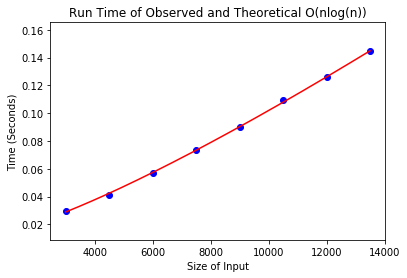

In [7]:
# regression line equation
x = np.linspace(3000, 13500, 10500)
line = a + b * x + c * x * np.log2(x)

# scatterplot of observed and theoretical O(n^2) values
plt.scatter(length, times, c = 'b')  # plot observed values in blue
plt.plot(x, line, c = 'r')  # plot regression line equation in red
plt.xlabel('Size of Input')
plt.ylabel('Time (Seconds)')
plt.title('Run Time of Observed and Theoretical O(nlog(n))')
plt.show()

### Mean Squared Error
- mean squared error measures the squared distance between observed and theoretical values. A small mean squared error indicates observed and theoretical run times are similar
- heap sort obtains an MSE that is close to 0, meaning the theoretical run times are a good estimate
- this means heap sort has a run time of O(nlog(n))

In [8]:
# output the MSE
MSE = '{:10.9f}'.format(result.mse_resid)
MSE

'0.000001092'

## Conclusion
 - the theoretical run time of heap sort is O(nlog(n))
 - data obtained from sorting sample arrays supports this conclusion
    - on the scatterplot, observed values are close to theoretical values
    - the mean squared error is close to 0
